## Reavaliando os missings

In [4]:
import polars as pl
import pandas as pd

In [6]:
data = pd.read_csv("data/train.csv", low_memory=False)
data.head()

,SEM_NOT,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,MAE_VAC,M_AMAMENTA,ANTIVIRAL,TP_ANTIVIR,HOSPITAL,UTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,AMOSTRA,TP_AMOSTRA,OUT_AMOST,CLASSI_FIN,HISTO_VGM,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FNT_IN_COV,DELTA_UTI,ID
0,38,37,RS,005 CRS,1608.0,CAXIAS DO SUL,430510,M,73,3,3073,6,1,NaN,RS,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,ESQUIZOFRENIA,2.0,NaN,NaN,2.0,NaN,1.0,2.0,2.0,NaN,NaN,1.0,1.0,NaN,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,0,0,1.0,-1,87360a9a-5516-4b0c-9c76-faceb759e97b
1,46,46,MS,NRS DE PONTA PORA,1972.0,PONTA PORA,500660,M,27,3,3027,6,1,4.0,MS,1.0,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,1.0,NaN,1.0,1.0,NaN,4,0,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,9.0,0,0,0,1.0,-1,e5532e89-f7e8-4239-991b-16cf3c3a5be6
2,18,17,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,F,2,3,3002,6,4,5.0,CE,1.0,NaN,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,1.0,2.0,3.0,9.0,NaN,1.0,1.0,NaN,4,0,NaN,NaN,NaN,2.0,2.0,2.0,2.0,6.0,NaN,1.0,1,1,0,2.0,-1,dbaa33c2-d374-48d7-a0f3-f0775550b1a4
3,4,3,SP,GVE VII SANTO ANDRE,1332.0,MAUA,352940,F,71,3,3071,5,4,NaN,SP,1.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,1,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,1.0,2.0,2.0,2.0,NaN,1.0,1.0,NaN,4,0,NaN,NaN,NaN,2.0,1.0,2.0,2.0,6.0,NaN,1.0,1,1,0,2.0,-1,ecbf8128-42a7-4668-be28-905b6168578d
4,12,11,MG,JANUARIA,1470.0,SAO JOAO DA PONTE,316240,F,91,3,3091,5,4,0.0,MG,2.0,NaN,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,FRAQUEZA,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2.0,2.0,1.0,NaN,1.0,1.0,NaN,4,0,621005,TRABALHADOR AGROPECUARIO EM GERAL,NaN,2.0,2.0,2.0,2.0,NaN,NaN,2.0,0,0,0,1.0,-1,4b74f720-bd35-42b0-8590-127985c79653


In [14]:
df_missing_count = (
    data.isnull()
    .sum()
    .reset_index()
    .sort_values(by=0, ascending=False)
    .head(60)
    .rename(columns={"index": "column", 0: "null_count"})
)


In [15]:
df_missing_count

,column,null_count
62,OUT_ANIM,1299816
42,OBES_IMC,1286880
47,M_AMAMENTA,1285578
46,MAE_VAC,1282681
60,PAC_COCBO,1272026
61,PAC_DSCBO,1272026
49,TP_ANTIVIR,1268247
68,TOMO_OUT,1263169
54,RAIOX_OUT,1254971
16,SURTO_SG,1222198


## AVE_SUINO + OUT_ANIM

In [18]:
out_anim_ave_suino_df = data[["OUT_ANIM", "AVE_SUINO"]]
out_anim_ave_suino_df.head()

,OUT_ANIM,AVE_SUINO
0,NaN,2.0
1,NaN,NaN
2,NaN,2.0
3,NaN,2.0
4,NaN,2.0


In [19]:
# ave_suino possui 3?
out_anim_ave_suino_df.value_counts(["AVE_SUINO"])

AVE_SUINO
2.0          879296
9.0          189228
1.0           11375
3.0            1164
dtype: int64

In [21]:
out_anim_ave_suino_pl = pl.from_pandas(out_anim_ave_suino_df)
out_anim_ave_suino_pl.head(10)



OUT_ANIM,AVE_SUINO
str,f64
null,2.0
null,null
null,2.0
null,2.0
null,2.0
null,9.0
null,2.0
null,2.0
null,9.0


In [27]:
outros_animais = out_anim_ave_suino_pl.filter(pl.col("AVE_SUINO") == 3)["OUT_ANIM"].to_list()
outros_animais

['CACHORRO',
 'CAO E GATO',
 'CACHORRO',
 'GATO',
 'CACHORRO',
 'CACHORRO',
 'GATO E CACHORRO',
 'COELHO E CACHORRO',
 'CACHORRO',
 'CAO , GATO',
 'GATOS',
 'GATO',
 'GATO',
 'GALINHAS',
 'CACHORRO',
 'CACHORRO',
 'CACHORRO',
 'GATO',
 'CACHORRO',
 'CACHORRO',
 'CACHORROS',
 'CACHORRO',
 'CACHORRO E GATO',
 'CACHORRO',
 'GATO',
 'CACHORRO',
 'CACHORRO',
 'CACHORRO',
 'CACHORRO',
 'CACHORROS',
 'CACHORRO',
 'CACHORROS',
 'CACHORRO',
 'CACHORRO',
 'CACHORRO',
 'CACHORRO',
 'GATO E CACHORRO',
 'CACHORRO',
 'GATO',
 'CACHORRO',
 'CACHORRO',
 'CACHORRO',
 'GATO PAPAGAIO CACHORRO',
 'GATO',
 'CACHORRO',
 'CACHORRO',
 'GENITOR TRABALHA EM FAZENDA',
 'CAO',
 'GATO E CACHORRO',
 'CACHORRO E GATO',
 'GATOS',
 'CAO',
 'GATOS E CACHORROS',
 'GATO',
 'CACHORRO,GATO',
 'CACHORRO',
 'CACHORRO',
 'CACHORRO',
 'GATO',
 'GATO',
 'CACHORRO',
 'CACHORRO',
 'GATO',
 'CACHORRO E GATO',
 'CACHORRO, GATO',
 'GATO',
 'GATO',
 'CAVALO',
 'CACHORRO',
 'CAES',
 'CAO, GATO',
 'CACHORRO',
 'BOVINO',
 'CACHORRO',
 '

In [37]:
# não tem como utilizar OUT_ANIM para imputar os missings do AVE_SUINO
out_anim_ave_suino_pl.filter(~pl.col("OUT_ANIM").is_null()).filter(
    pl.col("AVE_SUINO").is_null()
)


OUT_ANIM,AVE_SUINO
str,f64


In [42]:
out_anim_ave_suino_pl.null_count()

OUT_ANIM,AVE_SUINO
u32,u32
1299816,219917


### Conclusão

Acredito que uma suposição interessante para imputar no AVE_SUINO é setar a classe de maior frequência, onde temos a indicação de **Não** para o contato com aves, suíno ou outros animais.

E também, vamos descartar OUT_ANIM, pois exigiria uma padronização de todos as respostas dadas pelo usuário para pouco poder preditivo.

## OBESIDADE + OBES_IMC

In [44]:
obesidade_obes_imc_df = pl.from_pandas(data[["OBESIDADE", "OBES_IMC"]])
obesidade_obes_imc_df.head()

OBESIDADE,OBES_IMC
f64,str
null,null
null,null
null,null
2.0,null
null,null


In [45]:
obesidade_obes_imc_df.null_count()

OBESIDADE,OBES_IMC
u32,u32
828458,1286880


In [48]:
obesidade_obes_imc_df["OBESIDADE"].value_counts()

OBESIDADE,counts
f64,u32
2.0,371979
1.0,89588
9.0,10955
null,828458


In [51]:
obesidade_obes_imc_df.filter(pl.col("OBES_IMC").is_not_null())

OBESIDADE,OBES_IMC
f64,str
1.0,"""34"""
1.0,"""0,2"""
1.0,"""3,1"""
1.0,"""4,2"""
1.0,"""50"""
1.0,"""40"""
1.0,"""1"""
1.0,"""40,3"""
1.0,"""33,1"""


In [54]:
imc_only = obesidade_obes_imc_df.with_columns(
    [
        pl.col("OBES_IMC").str.replace(",", ".").cast(pl.Float64).alias("OBES_IMC"),
    ]
).filter(pl.col("OBES_IMC").is_not_null())

In [55]:
imc_only.describe()

describe,OBESIDADE,OBES_IMC
str,f64,f64
"""count""",14100.0,14100.0
"""null_count""",0.0,0.0
"""mean""",1.0,28.505033
"""std""",0.0,17.13694
"""min""",1.0,0.0
"""max""",1.0,425.0
"""median""",1.0,32.0


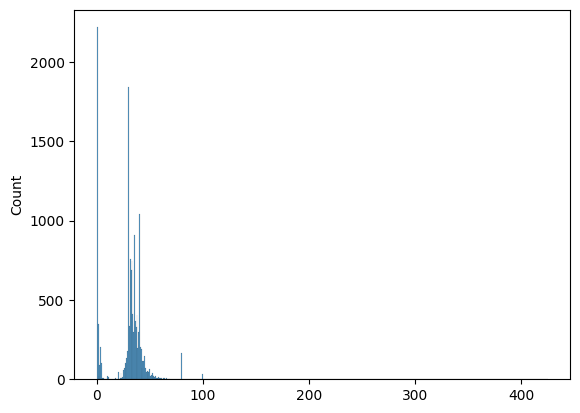

In [56]:
import seaborn as sns

_ = sns.histplot(imc_only["OBES_IMC"].to_numpy())

In [122]:
data_pl = pl.from_pandas(data)

def obesidade_cleaning(column: pl.Series):
    ...
    
data_pl.with_columns(
        pl.col("OBES_IMC").str.replace(",", ".").cast(pl.Float64).alias("OBES_IMC")
).with_columns(
    pl.col("OBES_IMC").fill_null(24)
)

SEM_NOT,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,...,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,MAE_VAC,M_AMAMENTA,ANTIVIRAL,TP_ANTIVIR,HOSPITAL,UTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,AMOSTRA,TP_AMOSTRA,OUT_AMOST,CLASSI_FIN,HISTO_VGM,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FNT_IN_COV,DELTA_UTI,ID
i64,i64,str,str,f64,str,i64,str,i64,i64,str,i64,i64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,f64,f64,f64,f64,f64,...,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,i64,i64,str,str,str,f64,f64,f64,f64,f64,str,f64,i64,i64,i64,f64,i64,str
38,37,"""RS""","""005 CRS""",1608.0,"""CAXIAS DO SUL""",430510,"""M""",73,3,"""3073""",6,1,null,"""RS""",2.0,null,2.0,2.0,null,null,null,null,null,null,null,null,null,null,null,1,null,null,null,null,null,null,...,null,null,null,null,1.0,"""ESQUIZOFRENIA""",2.0,null,null,2.0,null,1.0,2.0,2.0,null,null,1.0,1.0,null,4,0,null,null,null,null,null,null,null,null,null,2.0,0,0,0,1.0,-1,"""87360a9a-5516-..."
46,46,"""MS""","""NRS DE PONTA P...",1972.0,"""PONTA PORA""",500660,"""M""",27,3,"""3027""",6,1,4.0,"""MS""",1.0,null,null,null,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,null,null,null,2,null,null,null,null,null,null,...,null,null,null,null,null,null,null,null,null,2.0,null,2.0,null,2.0,1.0,null,1.0,1.0,null,4,0,null,null,null,2.0,2.0,2.0,2.0,null,null,9.0,0,0,0,1.0,-1,"""e5532e89-f7e8-..."
18,17,"""CE""","""1 CRES FORTALE...",1519.0,"""FORTALEZA""",230440,"""F""",2,3,"""3002""",6,4,5.0,"""CE""",1.0,null,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,null,null,2,null,null,null,null,null,null,...,null,null,null,null,null,null,2.0,null,null,2.0,null,1.0,2.0,3.0,9.0,null,1.0,1.0,null,4,0,null,null,null,2.0,2.0,2.0,2.0,6.0,null,1.0,1,1,0,2.0,-1,"""dbaa33c2-d374-..."
4,3,"""SP""","""GVE VII SANTO ...",1332.0,"""MAUA""",352940,"""F""",71,3,"""3071""",5,4,null,"""SP""",1.0,null,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,null,2.0,1,1.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,null,2.0,null,2.0,null,null,2.0,null,1.0,2.0,2.0,2.0,null,1.0,1.0,null,4,0,null,null,null,2.0,1.0,2.0,2.0,6.0,null,1.0,1,1,0,2.0,-1,"""ecbf8128-42a7-..."
12,11,"""MG""","""JANUARIA""",1470.0,"""SAO JOAO DA PO...",316240,"""F""",91,3,"""3091""",5,4,0.0,"""MG""",2.0,null,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,"""FRAQUEZA""",null,2,null,null,null,null,null,null,...,null,null,null,null,null,null,1.0,null,null,null,null,1.0,2.0,2.0,1.0,null,1.0,1.0,null,4,0,"""621005""","""TRABALHADOR AG...",null,2.0,2.0,2.0,2.0,null,null,2.0,0,0,0,1.0,-1,"""4b74f720-bd35-..."
10,10,"""MG""","""BELO HORIZONTE...",1449.0,"""BELO HORIZONTE...",310620,"""F""",78,3,"""3078""",5,4,9.0,"""MG""",1.0,null,9.0,9.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,null,null,2,null,null,null,null,null,null,...,null,null,null,null,null,null,9.0,null,null,2.0,null,1.0,2.0,2.0,6.0,null,1.0,1.0,null,4,0,null,null,null,2.0,2.0,2.0,2.0,null,null,9.0,0,0,0,1.0,-1,"""049971ea-1e3a-..."
7,7,"""BA""","""NUCLEO REGIONA...",1388.0,"""ITABELA""",291465,"""M""",92,3,"""3092""",6,4,0.0,"""BA""",1.0,null,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,null,null,2,null,null,null,null,null,null,...,null,null,null,null,null,null,1.0,null,null,2.0,null,1.0,2.0,2.0,6.0,null,1.0,1.0,null,4,0,null,null,null,2.0,2.0,2.0,2.0,6.0,null,1.0,1,1,0,1.0,-1,"""4571ed45-9616-..."
2,2,"""RJ""",null,null,"""RIO DE JANEIRO...",330455,"""M""",1,3,"""3001""",6,4,5.0,"""RJ""",1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,null,null,2,null,null,null,null,null,null,...,null,null,null,null,null,null,null,null,null,2.0,null,1.0,1.0,1.0,4.0,null,1.0,1.0,null,4,2,null,null,null,2.0,2.0,2.0,2.0,6.

### Conclusões

Regras para imputar os missings de OBES_IMC:

1. Se OBESIDADE == 1, SE OBES_IMC >= 30, OBES_IMC
2. Se OBESIDADE == 1, SE OBES_IMC < 30, OBES_IMC = 30
3. Se OBESIDADE == 1, SE OBES_IMC >= 100, OBES_IMC = 30
4. Se OBESIDADE missing, OBES_IMC = 24

Dae OBES_IMC viraria IMC.

Regras para imputar os missings no OBESIDADE, aqui vamos seguir pelo mais frequente mesmo.

## IDADE + MAE_AMAMENTA + MAE_VACINA

In [62]:
idade_mae_related = pl.from_pandas(data[["M_AMAMENTA", "MAE_VAC", "NU_IDADE_N", "TP_IDADE"]])
idade_mae_related.head()


M_AMAMENTA,MAE_VAC,NU_IDADE_N,TP_IDADE
f64,f64,i64,i64
null,null,73,3
null,null,27,3
null,null,2,3
null,null,71,3
null,null,91,3


In [67]:
idade_mae_related.filter(pl.col("TP_IDADE").is_in([1, 2])).select(pl.col("NU_IDADE_N")).describe()

describe,NU_IDADE_N
str,f64
"""count""",63288.0
"""null_count""",0.0
"""mean""",4.937397
"""std""",4.045001
"""min""",-9.0
"""max""",70.0
"""median""",4.0


In [69]:
idade_mae_related.filter(pl.col("TP_IDADE") == 2).filter(pl.col("NU_IDADE_N") <= 6)

M_AMAMENTA,MAE_VAC,NU_IDADE_N,TP_IDADE
f64,f64,i64,i64
1.0,9.0,2,2
null,null,1,2
null,null,3,2
null,null,3,2
null,null,4,2
null,null,2,2
null,null,1,2
null,null,0,2
null,null,1,2


In [70]:
idade_mae_related.filter(pl.col("TP_IDADE") == 3)

M_AMAMENTA,MAE_VAC,NU_IDADE_N,TP_IDADE
f64,f64,i64,i64
null,null,73,3
null,null,27,3
null,null,2,3
null,null,71,3
null,null,91,3
null,null,78,3
null,null,92,3
null,null,1,3
null,null,87,3


### Conclusões

- M_AMAMENTA e MAE_VAC não estão muito condizentes de realizar uma imputação. Justamente por conta do tipo idade e da idade não estarem batendo direitinho com a descrição da doc. Então acho melhor dropar essas variáveis.
- NU_IDADE_N e TP_IDADE eu acho q vale juntar:
    - Colocando 0 em NU_IDADE_N para TP_IDADE in [1, 2]
    - Posteriormente é possível também tentar discretizar nos seguintes intervalors:
        - 0 a 12 (criança)
        - 12 a 18 (adolescente)
        - 18 a 29 (jovem)
        - 29 a 59 (adulto)
        - `>` 59 (idoso)



## PAC_COCBO e PAC_DSCBO

Acho q aqui só dropar msmo. Alto número de missings, nada conclusivo para imputar.

## TP_ANTIVIR + ANTIVIRAL

In [76]:
viral = pl.from_pandas(data[["TP_ANTIVIR", "ANTIVIRAL"]])
viral.head()

TP_ANTIVIR,ANTIVIRAL
f64,f64
null,2.0
null,2.0
null,2.0
null,2.0
null,null


In [77]:
viral.filter(pl.col("ANTIVIRAL") == 1)

TP_ANTIVIR,ANTIVIRAL
f64,f64
1.0,1.0
3.0,1.0
1.0,1.0
1.0,1.0
1.0,1.0
1.0,1.0
1.0,1.0
1.0,1.0
1.0,1.0


In [78]:
viral.null_count()

TP_ANTIVIR,ANTIVIRAL
u32,u32
1268247,224350


In [83]:
viral.filter(pl.col("ANTIVIRAL") == 1)["TP_ANTIVIR"].value_counts()

TP_ANTIVIR,counts
f64,u32
1.0,27819
2.0,322
3.0,4592
null,6364


In [84]:
viral["ANTIVIRAL"].value_counts()

ANTIVIRAL,counts
f64,u32
9.0,181723
1.0,39097
2.0,855810
null,224350


### Conclusões

- Vou colocar a imputação do mais frequente para os casos 1 do ANTIVIRAL no TP_ANTIVIR
- Para todo o resto vamos imputar o 0. Uma categoria para indicar que todos os outros pacientes não receberam outro tipo de antiviral.
- na variável ANTIVIRAL com missings, a gente poderia imputalos tbm com o mais frequente, 2.

## TOMO_RES + TOMO_OUT

In [85]:
tomo = pl.from_pandas(data[["TOMO_RES", "TOMO_OUT"]])
tomo.head()

TOMO_RES,TOMO_OUT
f64,str
null,null
null,null
6.0,null
6.0,null
null,null


In [86]:
tomo.null_count()

TOMO_RES,TOMO_OUT
u32,u32
455610,1263169


In [90]:
tomo.filter(pl.col("TOMO_RES") == 5)["TOMO_OUT"].to_list()

['SEM LAUDO',
 None,
 'CONSOLIDACAO BRONCOGRAMAS',
 'DERRAME/ATELECTASIA',
 'DERRAME PLEURAL LAMINAR BILATE',
 None,
 'VIDRO FOSCO, CONSOLIDACAO',
 None,
 'CONSOLIDACAO + VIDRO FOSCO',
 'SINAIS DE DOENCA PULMONAR',
 None,
 None,
 None,
 None,
 'CONSOLIDACAO A DIREITA E TAMB',
 'DERRAME PLURAL',
 'PNEUMONIA',
 'HIDROPNEUMOTORAX',
 'FIBROATELECTASICA',
 'EMPIEMA, FISTULA BRONCOPLEURAL',
 'CONSOLIDACAO EM BASE ESQUEERDA',
 'GRANULOMA PULMONAR',
 None,
 'AVE',
 'SOLICITADO',
 'PNEUMONIA',
 'SEM LAUD',
 None,
 'SINAIS DE HIPERINSUFLACAO',
 'PROCESSO INFLAMATORIO/ INFECCI',
 'HIPERTENSAO PULMONAR',
 'AREAS DE ATEN DE PEQUEN VIAS',
 'ATELECTASIAS',
 'ACOMETIMENTO PULMONAR 25%',
 None,
 'DERRAME PLEURAL',
 'OPACIDADES',
 'ATELECTASIA',
 'NODULO CALCIFICADO',
 None,
 None,
 None,
 'ESPESSAMENTO BRONQUIO',
 'FIBROSE PULMONAR',
 None,
 'NORMAL',
 None,
 'VIDRO FOSCO',
 'VIDRO FOSCO',
 'APENDICITE AGUDA',
 None,
 'PEQUENO DERRAME PLEURAL BILATE',
 'ESPESSAMENTO BRONQUICO DIFUSO',
 'SEM LAUDO',
 'V

In [93]:
tomo["TOMO_RES"].value_counts(sort=True)

TOMO_RES,counts
f64,u32
null,455610
1.0,365356
6.0,295660
9.0,74398
5.0,45323
2.0,33853
3.0,24856
4.0,5924


### Conclusões

- Drop TOMO_OUT
- Impute most frequent TOMO_RES (Típico Covid-19) ou imputar com 9 ou imputar com uma nova categoria.
    - Essa nova categoria representaria casos que não foi feita uma tomografia (6), faz sentido se a gente pensar que essas variáveis estão relacionadas com a ocasião de ter tido a tomografia.

## RAIOX_RES + RAIOX_OUT

In [99]:
raio_x = pl.from_pandas(data[["RAIOX_RES", "RAIOX_OUT", "FNT_IN_COV"]])
raio_x.head()

RAIOX_RES,RAIOX_OUT,FNT_IN_COV
f64,str,f64
null,null,1.0
1.0,null,1.0
9.0,null,2.0
2.0,null,2.0
1.0,null,1.0


In [96]:
raio_x.filter(pl.col("RAIOX_RES") == 5)

RAIOX_RES,RAIOX_OUT
f64,str
5.0,null
5.0,"""AGUARDA LAUDO"""
5.0,"""OPACIDADES"""
5.0,"""PNEUMOPATIA CO..."
5.0,null
5.0,null
5.0,"""OPACIDADE PARE..."
5.0,null
5.0,"""CONGESTAO"""


In [97]:
raio_x.null_count()

RAIOX_RES,RAIOX_OUT
u32,u32
532081,1254971


In [98]:
raio_x["RAIOX_RES"].value_counts(sort=True)

RAIOX_RES,counts
f64,u32
null,532081
6.0,350319
2.0,155519
9.0,120290
5.0,59567
1.0,40901
3.0,22133
4.0,20170


In [110]:
raio_x.filter(pl.col("RAIOX_RES").is_null())["FNT_IN_COV"].value_counts().with_columns(
    pl.col("counts") / pl.col("counts").sum()
)


FNT_IN_COV,counts
f64,f64
2.0,0.305982
1.0,0.438651
null,0.255367


In [112]:
raio_x["FNT_IN_COV"].value_counts().with_columns(
    pl.col("counts") / pl.col("counts").sum())

FNT_IN_COV,counts
f64,f64
1.0,0.492281
2.0,0.316343
null,0.191376


### Conclusões

- Drop RAIOX_OUT
- mesma situação do TOMO_RES

## SURTO_SG (surto de síndrome gripal)

In [114]:
data[["SURTO_SG"]].value_counts()

SURTO_SG
2.0         49933
1.0         20879
9.0          7970
dtype: int64

## COD IDADE

COD_IDADE poderia seria discretizado em top X categorias. Tem códigos que só tem um registro.

In [116]:
data[["COD_IDADE"]].value_counts()

COD_IDADE
3001         25077
3059         22782
3057         22662
3058         22466
3055         21639
             ...  
3118             1
3119             1
3123             1
3124             1
3150             1
Length: 176, dtype: int64

In [117]:
data[["COD_IDADE"]].isnull().sum()

COD_IDADE    0
dtype: int64